<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/04-Polinomial-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Polinomial

## Salomón Ramírez

## Ejemplo 1

In [1]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) + (b2*x**2)) + rng.randn(size) # Agregamos ruido con distribución normal

In [2]:
x = x.reshape(-1,1)

In [3]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

In [4]:
x_test

array([[0.6029392 ],
       [2.0398809 ],
       [1.60366462],
       [1.88048471],
       [1.80345539],
       [1.19693697],
       [2.88198815],
       [2.36929111],
       [2.86179732],
       [1.84000595],
       [1.3050184 ],
       [1.00627444],
       [0.46658403],
       [2.67407367],
       [2.50154641],
       [2.71271576],
       [1.6598993 ],
       [0.64270479],
       [1.27389721],
       [1.46417715]])

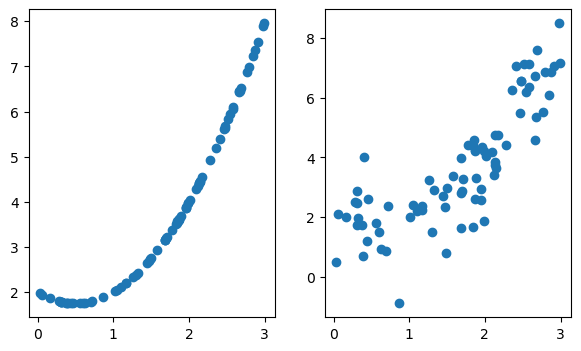

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.scatter(x,b0 + (b1*x) + (b2*x**2))
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.show()

Para crear la nueva feature $x^2$ usaremos la clase [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Esta clase genera una nueva matriz de características (*features*) consistente en todas las combinaciones polinómicas de las caractéristicas de grado menor o igual al grado especificado. 

Por ejemplo, si una muestra de entrada es bidimensional con la forma 

$$[a, b]$$

las características polinómicas (*polynomial features*) de grado 2 son 

$$[1, a, b, a^2, ab, b^2].$$

In [6]:
from sklearn.preprocessing import PolynomialFeatures

pfeats = PolynomialFeatures(degree=2, include_bias=False)
# pfeats = PolynomialFeatures(degree=2, include_bias=True)
new_x = pfeats.fit_transform(x)

Observar que le indicamos al constructor de la clase que no incluya el `bias` (la columna de 1s al principio de la nueva matriz de caracteristicas). Esto se hace porque pasaremos esta matriz a la regresión lineal, la cuál le agregará dicha columna.

La variable independiente era:

In [7]:
print(x[:5])

[[1.99185541]
 [0.05811746]
 [0.40667043]
 [1.95451352]
 [2.47314768]]


Las nuevas variables independientes son:

In [8]:
print(new_x[:5])

[[1.99185541e+00 3.96748798e+00]
 [5.81174589e-02 3.37763902e-03]
 [4.06670426e-01 1.65380836e-01]
 [1.95451352e+00 3.82012310e+00]
 [2.47314768e+00 6.11645946e+00]]


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(new_x,y)

LinearRegression()

In [10]:
lr.score(new_x,y)

0.7886608902823524

In [11]:
lr.intercept_,lr.coef_

(2.062498746137912, array([-1.15413317,  1.03549476]))

In [12]:
b0 = lr.intercept_
b1 = lr.coef_[0]
b2 = lr.coef_[1]

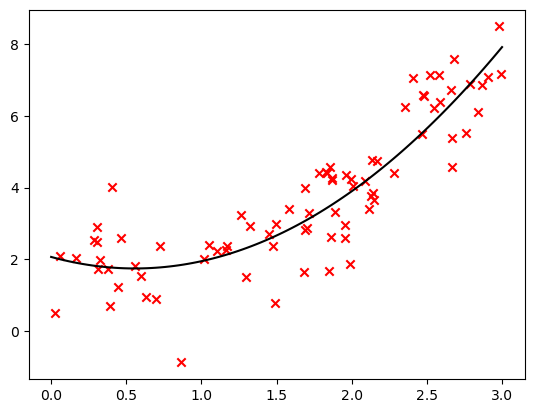

In [13]:
x_values = np.linspace(0, 3, 100)

y_hat = b0 + b1*x_values + b2*x_values**2 
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

⭕ Ahora evaluemos en el conjunto de prueba

In [14]:
x_test_p = pfeats.transform(x_test)
lr.score(x_test_p, y_test)

0.8450340566329249

### Pipelines

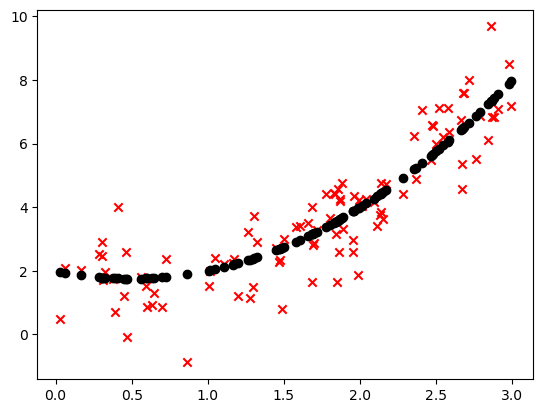

In [15]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

b3 = -2

x = 3 * rng.rand(size)
nonoise = (b0 + (b1*x) + (b2*x**2))
#nonoise = (b0 + (b1*x) + (b2*x**2) + (b3*x**3))
y = nonoise + rng.randn(size) # Agregamos ruido con distribución normal

x = x.reshape(-1,1)

plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.scatter(x, nonoise, color='black')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pl = Pipeline([#('scl',MinMaxScaler()),
               ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])

In [18]:
pl.fit(x,y)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

Podemos evaluar directamente el score

In [19]:
# Score Train
pl.score(x,y)

0.7886608902823524

In [20]:
pl['lr'].coef_

array([-1.15413317,  1.03549476])

In [21]:
pl['lr'].intercept_

2.062498746137912

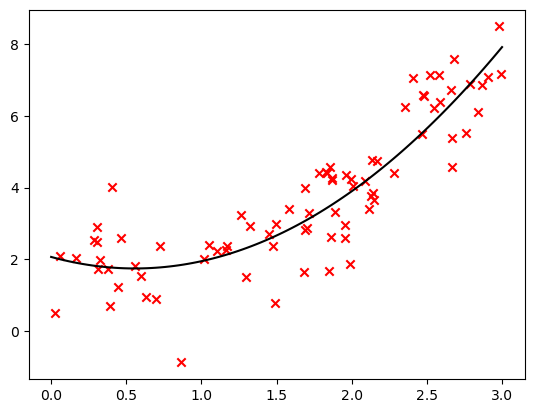

In [22]:
x_values = np.linspace(0, 3, 100)

b0 = pl['lr'].intercept_
b1 = pl['lr'].coef_[0]
b2 = pl['lr'].coef_[1]

#b3 = pl['lr'].coef_[2]

#y_hat = b0 + b1*x_values + b2*x_values**2 
y_hat = b0 + b1*x_values + b2*x_values**2 #+ b3*x_values**3
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

Veamos las predicciones en el conjunto de prueba

In [23]:
y_pred = pl.predict(x)

Comparemos las predicciones y los valores reales

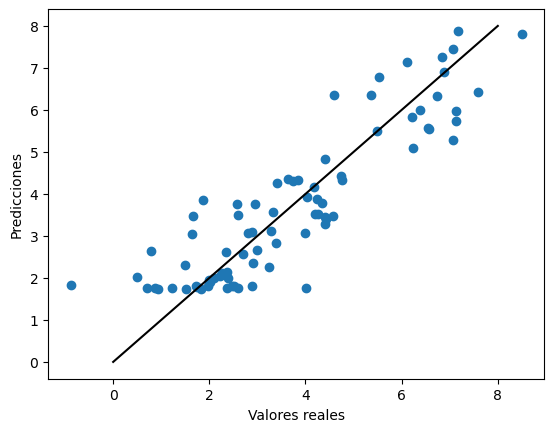

In [24]:
plt.figure()
plt.scatter(y,y_pred,label='Valores predichos')
plt.ylabel("Predicciones")
plt.xlabel("Valores reales")
plt.plot(np.linspace(0,8,100),np.linspace(0,8,100),color='black')
plt.show()

In [25]:
y_pred = pl.predict(x_test)

In [26]:
#Score Test
pl.score(x_test,y_test)

0.8450340566329249

## Ejemplo 2: Práctica

Usaremos el siguiente dataset de datos de peces. Hay un total de 159 filas (muestras de entrenamiento) y 7 columnas en el conjunto de datos. 

Los detalles de cada columna son los siguientes

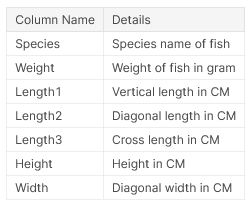

* Las variables independientes son "Especie", "Longitud1", "Longitud2", "Longitud3", "Altura" y "Anchura".
* La variable dependiente es "Peso".

Tenemos que estimar el peso del pez basándonos en sus valores de medición.

In [27]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/fishes.csv'
df_dl = pd.read_csv(url)
df = df_dl.copy()

⭕ Práctica

Construye un modelo de Regresión Lineal (Polinomial) para predecir el peso de un pez en función de las variables predictoras.

**Preprocesamiento**

* Cambia el nombre de las columnas por nombres relacionados con su interpretación.
* Verifica si hay valores faltantes
* Verifica la correlación entre variables usando el método [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad.
* Verifica si hay datos faltantes o invalidos.
* Explora la relación entre pares de variables usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de seaborn.
* Considera usar PolinomialFeatures en función de tus observaciones del punto anterior.
* Considera la codificación one-hot para la(s) variable(s) categórica(s).

**Regresión Lineal**
Entrena un modelo de RL separando una parte para entrenamiento y reporta la métrica de rendimiento r2score y [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Considera varios modelos para mejorar tus métricas.

In [28]:
# importamos las biliotecas necesarias

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

list(df)

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [29]:
# no hay valores faltantes:
df.isnull().sum().T

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [30]:
# creamos dummies para variables categóricas (más adelante se descartaron)
df_dummies = pd.get_dummies(df)
print(df.shape,df_dummies.shape)
df_dummies.head()

(159, 7) (159, 13)


,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False


In [31]:
# remplazamos true/false con 0 y 1
cols = ["Species_Bream","Species_Parkki","Species_Perch","Species_Pike","Species_Roach","Species_Smelt","Species_Whitefish"]
replacing_dict = {True:1, False:0}

for col in cols:
    df_dummies[col].replace(replacing_dict,inplace=True)
df_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [32]:
# intento de reordenar las columnas (me hacía Nan donde había remplazado True y False)
#newCols = ['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']
#newCols =["Length1","Length2","Length3","Height","Width","Species_Bream","Species_Parkki","Species_Perch","Species_Pike","Species_Roach","Species_Smelt","Species_Whitefish","Weight"]
#df_dummies = df.reindex(columns=newCols)
#df_dummies.head()

In [33]:
# checamos correlación. se ve que la especie no tiene tanta con Weight como las demás variables (excepto quizás las Bream y la Pike).
df_dummies.corr()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.233391,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.327170,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Bream,0.326795,0.216380,0.233391,0.327170,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


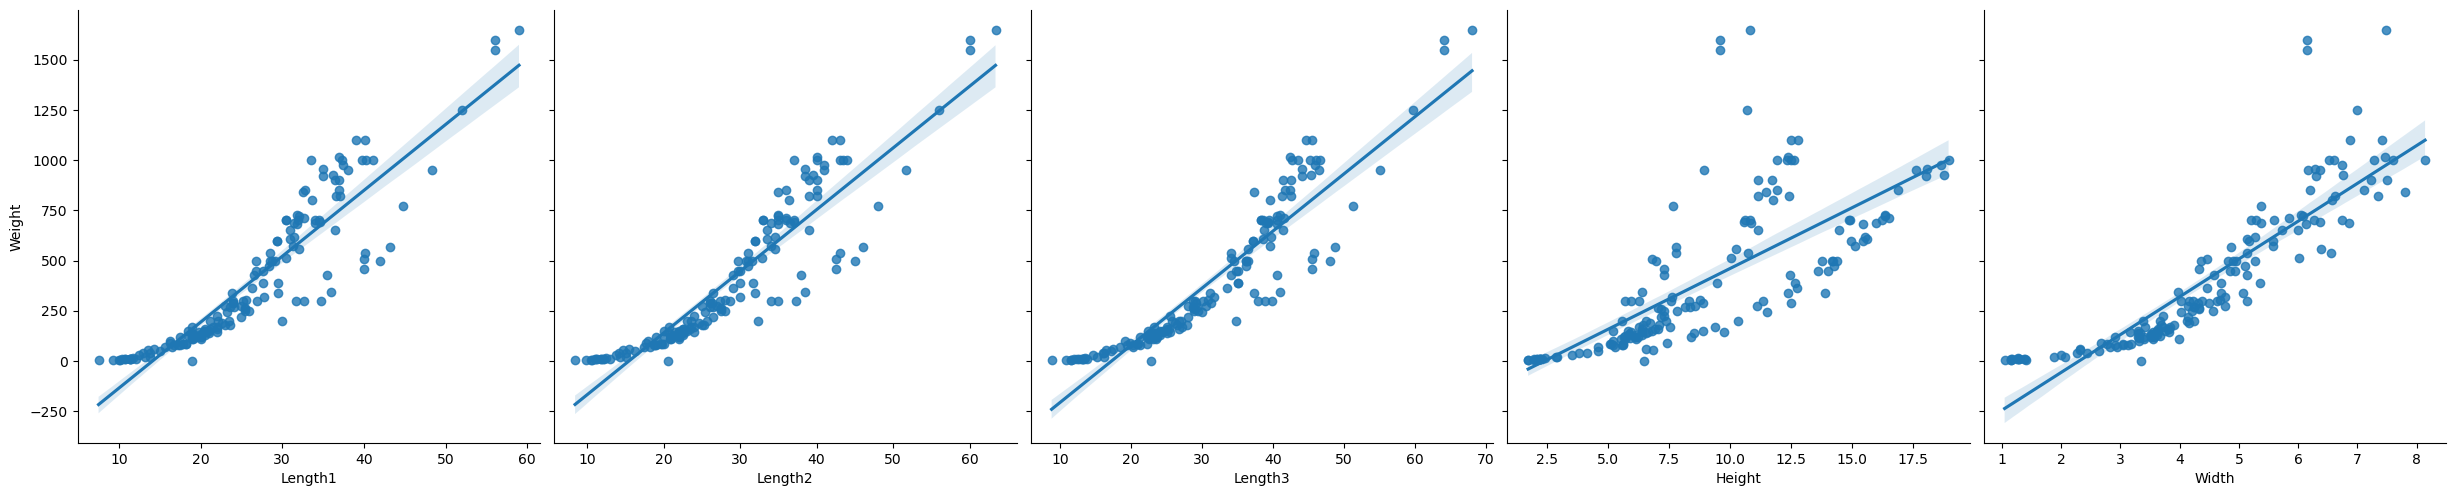

In [34]:

#sns.pairplot(df_dummies)#, x_vars=["Length1","Length2","Length3","Height","Width","Species_Bream","Species_Parkki","Species_Perch","Species_Pike","Species_Roach","Species_Smelt","Species_Whitefish"], y_vars='Weight', height=5, aspect=1, kind='reg')
sns.pairplot(df_dummies, x_vars=["Length1","Length2","Length3","Height","Width"], y_vars='Weight', height=5, aspect=1, kind='reg')
plt.show()

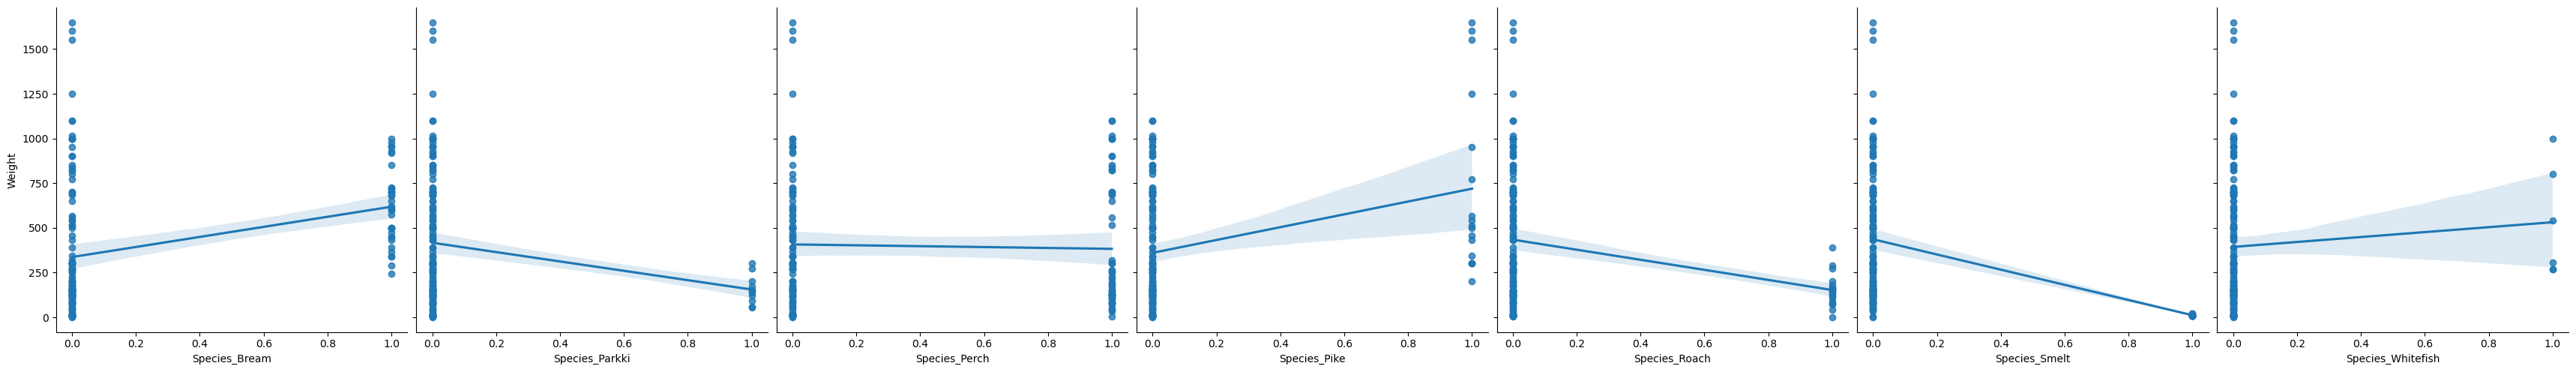

In [35]:
sns.pairplot(df_dummies, x_vars=["Species_Bream","Species_Parkki","Species_Perch","Species_Pike","Species_Roach","Species_Smelt","Species_Whitefish"], y_vars='Weight', height=5, aspect=1, kind='reg')
plt.show()

In [36]:
list(df_dummies)

['Weight',
 'Length1',
 'Length2',
 'Length3',
 'Height',
 'Width',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

In [37]:
# Slicing para X
X = df_dummies.loc[:,'Length1':'Species_Bream']
X.head()

,Length1,Length2,Length3,Height,Width,Species_Bream
0,23.2,25.4,30.0,11.5200,4.0200,1
1,24.0,26.3,31.2,12.4800,4.3056,1
2,23.9,26.5,31.1,12.3778,4.6961,1
3,26.3,29.0,33.5,12.7300,4.4555,1
4,26.5,29.0,34.0,12.4440,5.1340,1


In [38]:
list(X)

['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream']

In [39]:
# Slicing para Y
Y = df_dummies.loc[:,'Weight']
Y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [40]:
# Spitting
x, x_test, y, y_test = train_test_split(X,Y,train_size=0.75,random_state=2287)
x.head()

,Length1,Length2,Length3,Height,Width,Species_Bream
51,23.6,25.2,27.9,7.0866,3.9060,0
148,10.4,11.0,12.0,2.1960,1.3800,0
48,22.0,24.0,27.2,7.5344,3.8352,0
131,34.8,37.3,39.8,6.2884,4.0198,0
13,29.5,32.0,37.3,13.9129,5.0728,1


In [41]:
# Creamos un pipeline con escalador, agregador de características polinomiales y el predictor lineal
pl = Pipeline([('scl',MinMaxScaler()),
               ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])

pl.fit(x,y)

# Score Train
pl.score(x,y)

0.9882720539191698

In [42]:
# vemos cuántos coeficientes obtuvimos y el valor del intercept
print(pl['lr'].coef_.shape,pl['lr'].intercept_)

(27,) 17.29253346286231


In [43]:
# verificamos score de la predicción con los datos de prueba

y_pred = pl.predict(x_test)
#Score Test
pl.score(x_test,y_test)

0.9716666646600577

In [44]:
# comparamos los primeros 20 valores de test de prueba

displayn = 20

datapred = y_pred[:displayn].round(1)
datatest = y_test[:displayn].array

results = pd.DataFrame(data=[datapred,datatest]).T
results.rename(columns={0:'Predicted',1:'Real'}, inplace=True)

results



,Predicted,Real
0,255.7,272.0
1,401.7,500.0
2,444.6,390.0
3,487.6,500.0
4,76.8,69.0
5,24.4,55.0
6,77.7,90.0
7,-1.3,10.0
8,288.2,320.0
9,259.8,290.0


In [45]:
# veamos los coeficientes en orden de magnitud (de su valor absoluto)
columns = list(X)
coefs_dict = dict(zip(columns,pl['lr'].coef_))
dict(sorted(coefs_dict.items(),key=lambda x:abs(x[1]),reverse=True))

{'Length1': -2065.314977838735,
 'Length3': 1577.4255917895734,
 'Width': 637.4628779406299,
 'Length2': -488.60994021838064,
 'Height': -229.8703156642348,
 'Species_Bream': -63.19630451171507}

## Resultados

La variables Lenght contribuyen más al peso. Mientras que la especie afecta muy poco y por eso la desconté del modelo. Usar one-hot encoding para la especie tampoco me ayudó sino al contrario.

Sin embargo, al usar sólo Species_Bream en un one-hot encoding sí mejoró el MSE.

### R2

In [46]:
r2_score(y_test, y_pred)

0.9716666646600577

### MSE

In [47]:

mean_squared_error(y_test, y_pred)

2593.989550168539